# Ford Bike System Data Visualisation
The dataset of Ford GoBike System which we will be using is of December,03,2018.This dataset includes every information about each user rides made in a bike-sharing system in the greater San Francisco Bay area.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
#Reading files
df=pd.read_csv('201803-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,6,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78,Folsom St at 9th St,37.773717,-122.411647,47,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258,University Ave at Oxford St,37.872355,-122.266447,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186,Lakeside Dr at 14th St,37.801319,-122.262642,340,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


## Data Wrangling 

In [4]:
len(df)
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,111382.000000,111382.000000,111382.000000,111382.000000,111382.000000,111382.000000,111382.000000,111382.000000,102347.000000
mean,870.649899,115.068602,37.762768,-122.346778,112.919395,37.762873,-122.346017,2004.317206,1981.916207
std,2524.639122,96.681514,0.110751,0.128915,96.238634,0.110606,0.128311,1088.264577,10.588756
min,61.000000,3.000000,37.312854,-122.444293,3.000000,37.312854,-122.444293,11.000000,1900.000000
25%,351.000000,30.000000,37.771058,-122.411647,30.000000,37.771058,-122.409449,1107.000000,1976.000000
50%,549.000000,84.000000,37.781383,-122.397380,81.000000,37.781383,-122.397086,2079.000000,1984.000000
75%,853.000000,181.000000,37.795393,-122.283019,181.000000,37.795393,-122.287180,2952.000000,1989.000000
max,85844.000000,343.000000,37.880222,-121.874119,343.000000,37.880222,-121.874119,3756.000000,2000.000000


In [5]:
df.shape[0]

111382

In [6]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
92015,820,2018-03-07 08:51:29.7940,2018-03-07 09:05:10.7630,23,The Embarcadero at Steuart St,37.791464,-122.391034,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,1187,Subscriber,1992.0,Male,No
110001,385,2018-03-01 16:50:44.5230,2018-03-01 16:57:10.3320,49,S Park St at 3rd St,37.780760,-122.394989,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,3022,Subscriber,1983.0,Male,No
61161,228,2018-03-15 17:36:14.0020,2018-03-15 17:40:02.2880,8,The Embarcadero at Vallejo St,37.799953,-122.398525,16,Steuart St at Market St,37.794130,-122.394430,2072,Subscriber,1967.0,Male,No
4155,262,2018-03-30 17:17:12.4070,2018-03-30 17:21:34.6700,37,2nd St at Folsom St,37.785000,-122.395936,66,3rd St at Townsend St,37.778742,-122.392741,1260,Subscriber,1982.0,Male,No
11932,553,2018-03-29 08:47:26.4180,2018-03-29 08:56:39.8350,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,81,Berry St at 4th St,37.775880,-122.393170,2556,Subscriber,1982.0,Male,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111382 entries, 0 to 111381
Data columns (total 16 columns):
duration_sec               111382 non-null int64
start_time                 111382 non-null object
end_time                   111382 non-null object
start_station_id           111382 non-null int64
start_station_name         111382 non-null object
start_station_latitude     111382 non-null float64
start_station_longitude    111382 non-null float64
end_station_id             111382 non-null int64
end_station_name           111382 non-null object
end_station_latitude       111382 non-null float64
end_station_longitude      111382 non-null float64
bike_id                    111382 non-null int64
user_type                  111382 non-null object
member_birth_year          102347 non-null float64
member_gender              102385 non-null object
bike_share_for_all_trip    111382 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 13.6+ MB


In [8]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [9]:
#checking null values
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id           False
start_station_name         False
start_station_latitude     False
start_station_longitude    False
end_station_id             False
end_station_name           False
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

In [10]:
#checking the sum of the null values present
df.isnull().member_gender.sum()
df.isnull().member_birth_year.sum()

9035

In [11]:
#dropping the null values
df.dropna().reset_index(drop=True)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,6,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78,Folsom St at 9th St,37.773717,-122.411647,47,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258,University Ave at Oxford St,37.872355,-122.266447,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No
4,281,2018-03-31 23:58:07.8050,2018-04-01 00:02:49.3590,197,El Embarcadero at Grand Ave,37.808848,-122.249680,200,2nd Ave at E 18th St,37.800214,-122.253810,777,Subscriber,1991.0,Male,No
5,896,2018-03-31 23:47:48.7970,2018-04-01 00:02:45.5380,98,Valencia St at 16th St,37.765052,-122.421866,52,McAllister St at Baker St,37.777416,-122.441838,3624,Customer,1970.0,Male,No
6,440,2018-03-31 23:51:17.8000,2018-03-31 23:58:38.7120,11,Davis St at Jackson St,37.797280,-122.398436,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2410,Subscriber,1979.0,Female,Yes
7,169,2018-03-31 23:50:43.8140,2018-03-31 23:53:33.5710,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,-121.886943,1925,Subscriber,1957.0,Male,No
8,2765,2018-03-31 23:03:50.0160,2018-03-31 23:49:55.3190,318,San Carlos St at Market St,37.330698,-121.888979,318,San Carlos St at Market St,37.330698,-121.888979,1191,Customer,1981.0,Male,No
9,2756,2018-03-31 23:03:50.9690,2018-03-31 23:49:47.4880,318,San Carlos St at Market St,37.330698,-121.888979,318,San Carlos St at Market St,37.330698,-121.888979,335,Customer,1978.0,Male,No


In [12]:
df.shape[0]

111382

In [13]:
#correcting datatype of start_time and end_time
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [14]:
#converting to duration_sec to duration in minutes will help in polishing visualisation 
df['duration_min'] = df['duration_sec'] / 60.0

#### Data is now  ready to perform Visualisation further wrangling can be done according to the requirements.

## Data visualisation

### Univariate exploration
#### Filter data to include appropriate member age range

In [15]:
#since the birth year of member is given we can calculate the age of the members
df['member_age']=2019-df['member_birth_year']

In [16]:
df['member_age'].sample(5)

84332     NaN
6262      NaN
62022    39.0
79509    33.0
36151     NaN
Name: member_age, dtype: float64

In [17]:
#checking outliers
df.member_age.describe()

count    102347.000000
mean         37.083793
std          10.588756
min          19.000000
25%          30.000000
50%          35.000000
75%          43.000000
max         119.000000
Name: member_age, dtype: float64

Text(0.5,0,'Age of Bike Riders')

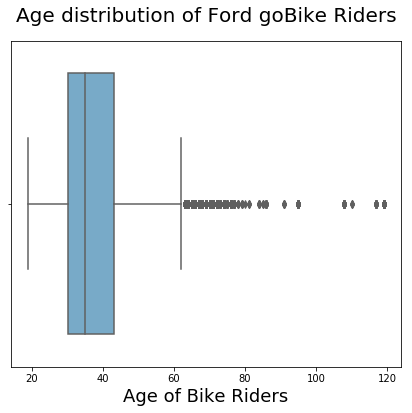

In [18]:
plt.figure(figsize=(7,6))
sb.boxplot(data=df,x='member_age',palette='Blues')
plt.title('Age distribution of Ford goBike Riders',fontsize=20,y=1.04)
plt.xlabel('Age of Bike Riders',fontsize=18)


Age from 19 to 63 takes almost 95 percent of the data.There are outliers present in the database.There are users more then 100 years old .From ford website they do allow users to put an unnusual age such as 1918.Removing users more then 60 years old will give us more accuracy thus removing the outliers.

In [19]:
df=df.query('member_age <= 63')

In [20]:
df.member_age.mean()

36.464445549477873

The mean age of the users of Ford Bike Share is approx 36.46

In [21]:
df.drop(['member_birth_year'], axis=1, inplace=True)

Text(0.5,1,'Count of Members age')

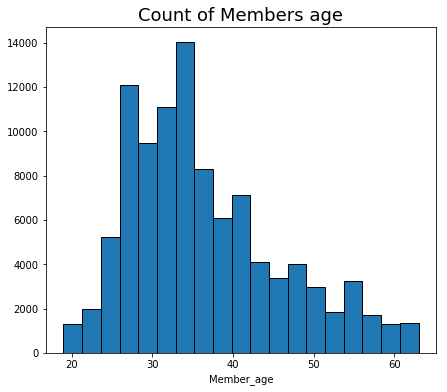

In [22]:
#plotting histogram for member_age to see which age peoples do take most trip
plt.figure(figsize=(7,6))
plt.hist(df['member_age'], edgecolor = 'black',bins = int(190/10))
plt.xlabel('Member_age');
plt.title('Count of Members age',fontsize=18)

Text(0.5,1,'Customer Vs Subscriber')

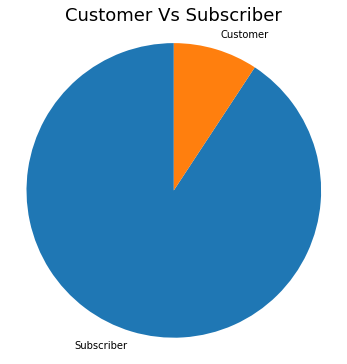

In [23]:
#plotting the most no of user weather customer or subcriber
plt.figure(figsize=(7,6))
sorted_count=df['user_type'].value_counts()
plt.pie(sorted_count,labels=sorted_count.index,startangle=90)
plt.axis('square',counterclock=False,wedgeprops={'width':0.4});
plt.title('Customer Vs Subscriber',fontsize=18)

#### Subscribers are more in comparison to customer

In [24]:
df['member_gender'].value_counts()

Male      73854
Female    25234
Other      1462
Name: member_gender, dtype: int64

Text(0.5,1,'Count of Members Gender')

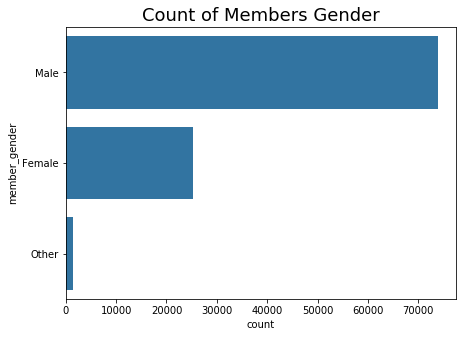

In [25]:
#plotting the graph of member ggender
plt.figure(figsize=(7,5))
order=df['member_gender'].value_counts().index
base_color=sb.color_palette()[0]
sb.countplot(data=df,y='member_gender',color=base_color,order=order);
plt.title('Count of Members Gender',fontsize=18)

#### Males are more in comparison with any gender

Text(0.5,1,'Most Duration of Rides')

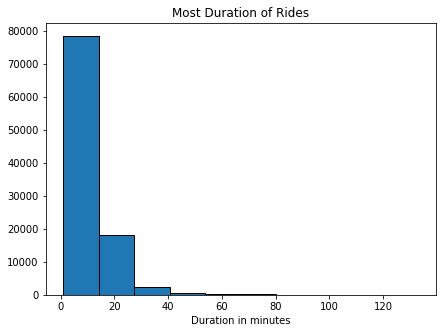

In [46]:
#checking and plotting the most common duration 
plt.figure(figsize=(7,5))
plt.hist(df['duration_min'], edgecolor = 'black')
plt.xlabel('Duration in minutes')
plt.title('Most Duration of Rides');

#### Most of the duration is between 0 to 15 minutes

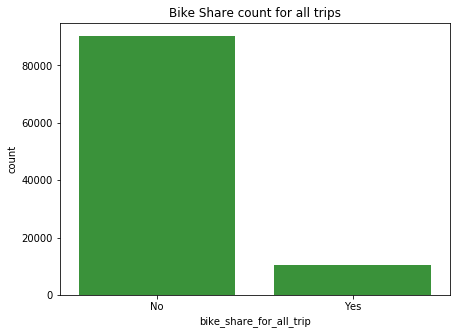

In [27]:
#checking and plotting the bike_share_for_all_trip 
plt.figure(figsize=(7,5))
order=df['bike_share_for_all_trip'].value_counts().index
base_color=sb.color_palette()[2]
sb.countplot(data=df,x='bike_share_for_all_trip',color=base_color,order=order);
plt.title('Bike Share count for all trips');

There is very less bike share for all trip i.e most of themdo not prefer to share bikes

In [28]:
#Find the count of all the start_station_name 
df.start_station_name.value_counts()

San Francisco Caltrain (Townsend St at 4th St)                     2213
Berry St at 4th St                                                 2144
Market St at 10th St                                               2125
San Francisco Ferry Building (Harry Bridges Plaza)                 2024
San Francisco Caltrain Station 2  (Townsend St at 4th St)          1814
Montgomery St BART Station (Market St at 2nd St)                   1725
Howard St at Beale St                                              1662
Powell St BART Station (Market St at 4th St)                       1657
The Embarcadero at Sansome St                                      1647
Steuart St at Market St                                            1522
Powell St BART Station (Market St at 5th St)                       1346
Townsend St at 7th St                                              1303
Embarcadero BART Station (Beale St at Market St)                   1228
4th St at Mission Bay Blvd S                                    

In [29]:
#Find the count of all the start_station_name 
df['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)                     3136
San Francisco Caltrain Station 2  (Townsend St at 4th St)          2506
San Francisco Ferry Building (Harry Bridges Plaza)                 2478
Montgomery St BART Station (Market St at 2nd St)                   2117
Berry St at 4th St                                                 2075
Market St at 10th St                                               1939
Powell St BART Station (Market St at 4th St)                       1848
The Embarcadero at Sansome St                                      1833
Steuart St at Market St                                            1594
Powell St BART Station (Market St at 5th St)                       1437
Townsend St at 7th St                                              1433
Howard St at Beale St                                              1308
4th St at Mission Bay Blvd S                                       1250
19th Street BART Station                                        

In [30]:
#Now plotting the count of trips by the days of week
df['Day_of_week']=df['start_time'].dt.dayofweek

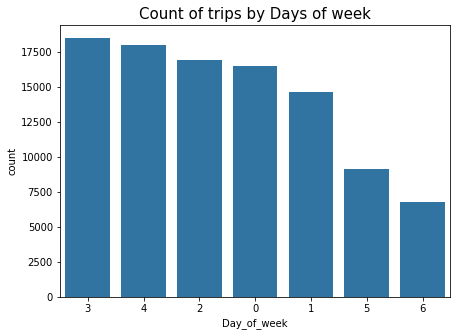

In [31]:
#On which day the trips are most? 
plt.figure(figsize=(7,5))
base_color=sb.color_palette()[0]
sb.countplot(data=df,x='Day_of_week',color=base_color,order=df['Day_of_week'].value_counts().index);
plt.title('Count of trips by Days of week', fontsize=15);

#### Mostly maximum no of rides were taken on Thursday and Friday and very less no of trips taken from Saturday and Sunday

In [32]:
df['start_hours']=df['start_time'].dt.hour

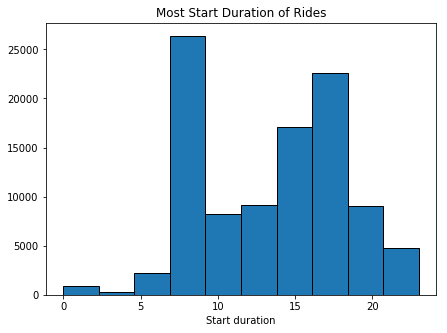

In [33]:
#checking and plotting the most start duration
plt.figure(figsize=(7,5))
plt.hist(df['start_hours'], edgecolor = 'black')
plt.xlabel('Start duration');
plt.title('Most Start Duration of Rides');

#### Most start duration is between 7 to 9 and then 16 to 18

## Conclusions from univarite exploratory data analysis
1. Age from 19 to 63 takes almost 95 percent of the data.
2. Maximum no. of riders are of age group 25-43 years.
3. The no. of Subscribers are more as compared to Customers who take ride.
4. The no. of Male riders are more as compared to Female and Other riders.
5. Most of the duration is between 0 to 15 minutes
6. The no. of bike share for all trips are very less.
7. Maximum number of rides were taken on Monday and Wednesday.
8. Most start duration is between 7 to 9 and then 16 to 18

## Bivariate exploratory data analysis

Text(0.5,1,'Most Duration of Rides')

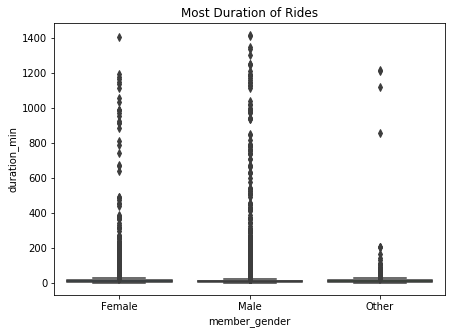

In [34]:
#Plotting  member_gender and duration_sec.
plt.figure(figsize=(7,5))
sb.boxplot(data=df,x='member_gender',y='duration_min')
plt.title('Most Duration of Rides')

#### Ride Duration is more in females in case of males comparitevely checking with ylim that duration_min of females  ,75 percent of the data falls below  approx 18mins.

There are lot of outliers.Therefore, removing the outliers

In [35]:
df=df.query('duration_sec <8000')

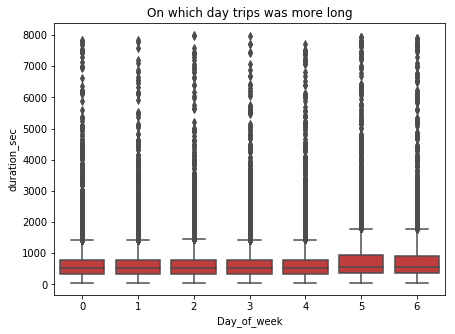

In [36]:
#Plotting a box plot using Day_of_week and duration_sec.
plt.figure(figsize=(7,5))
base_color=sb.color_palette()[3]
sb.boxplot(data=df,x="Day_of_week", y="duration_sec",color=base_color);
plt.title('On which day trips was more long');

As per expectations,Weekends i.e Saturday and Sunday has more duration of rides

Text(0.5,1,'What users take more longer trips ')

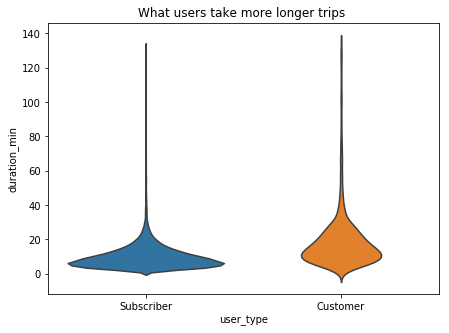

In [37]:
#plotting a violinplot on Subscriber Vs Customer(What users take more longer trips)
plt.figure(figsize=(7,5))
sb.violinplot(data=df,x='user_type',y='duration_min',inner=None);
plt.title('Duration(in min) VS user_type')

#### Duration of ride of customer is more then that of subsciber

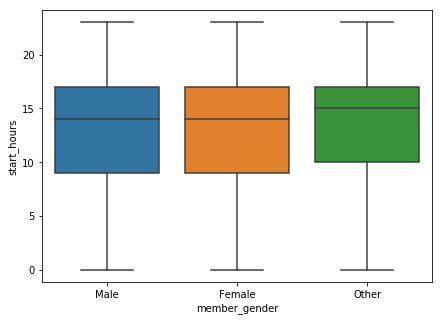

In [38]:
#Plotting  member_gender and start_hours.
plt.figure(figsize=(7,5))
sb.boxplot(data=df,x='member_gender',y='start_hours')

#### It is noted that both the genders starts from the same time i.e gender makes no difference in start time.

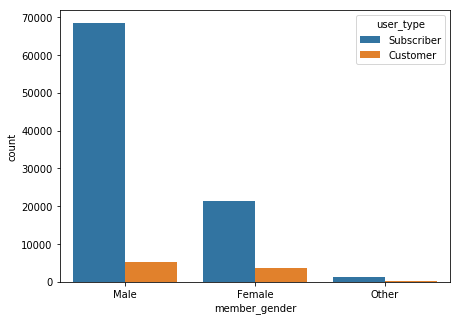

In [39]:
#Plotting  member_gender and user_type.
plt.figure(figsize=(7,5))
sb.countplot(data=df,x='member_gender',hue='user_type');

#### It is observed that in Males subscribers are more  then female.And there are more male customers than female  

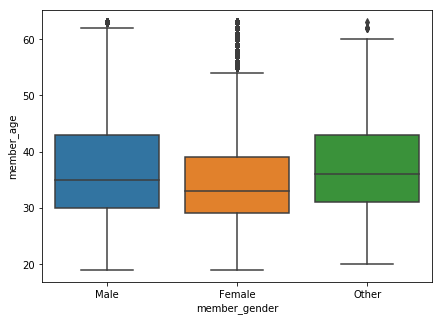

In [40]:
#Plotting  member_gender and duration_sec.
plt.figure(figsize=(7,5))
sb.boxplot(data=df,y='member_age',x='member_gender');

#### Females take rides at the earlier age groups as cmpared to males and other.

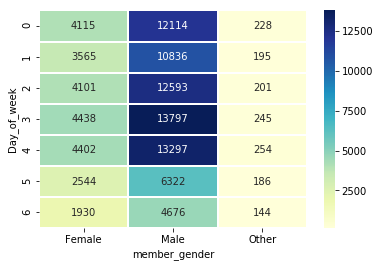

In [41]:
#grouping 2 columns 'user_type' and 'member_gender' and 'Day_of_week'
#creating the pivot to plot the heat map
#plotting heat map
x=df.groupby(['member_gender','Day_of_week']).size()
x=x.reset_index(name='count')
x = x.pivot("Day_of_week", "member_gender", "count")
sb.heatmap(x,linewidth=1,annot=True,cmap="YlGnBu",fmt='g')

#### More no of rides where taken on Thurday and Friday

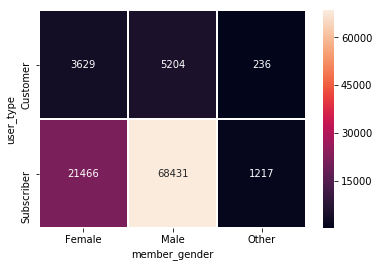

In [42]:
#Grouping 2 columns 'member_gender' and 'user_type'.
#Creating a pivot to plot heat maps
#Plotting a heat map using the above pivot.
a = df.groupby(['member_gender','user_type']).size()
a=a.reset_index(name='count')
a = a.pivot("user_type", "member_gender", "count")
sb.heatmap(a,linewidth=1,annot=True,fmt='g');

#### There are maximum no. of  males subscribers

### Conclusion from Bivariate exploratory Data analysis
1. Ride Duration is more in males in case of males comparitevely
2. As per expectations,Weekends i.e Saturday and Sunday has more duration of rides
3. Duration of ride of customer is more then that of subsciber
4. It is noted that both the genders starts from the same time i.e gender makes no difference in start time.
5. Females are the one who are taking rides earlier in comparison to other gender.
6. More no of rides where taken on Thurday and Friday
7. There are maximum no. of  males subscribers


## Multivariate Exploratory Data Analysis

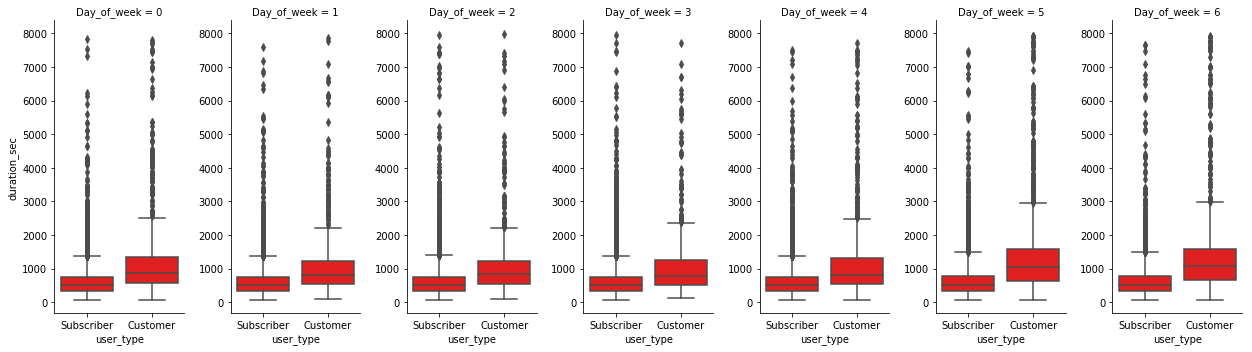

In [43]:
#Faceting for analysing 3 columns 'Day_of_week', 'user_type' and 'duration_sec'.
plt.figure(figsize=(7,7))
g = sb.FacetGrid(data = df, col = 'Day_of_week',aspect=0.5,size=5,margin_titles=True)
g.map(sb.boxplot, 'user_type', 'duration_sec',order=["Subscriber","Customer"],color="r");

#### The duration of rides by Customers is more on Saturday and Sunday.

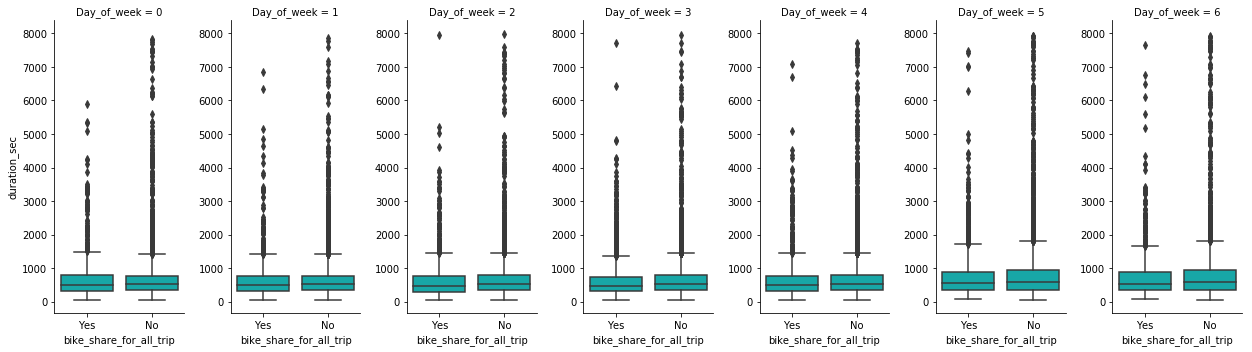

In [44]:
# Faceting for analysing 3 columns 'Day_of_week', 'bike_share_for_all_trip' and 'duration_sec'.
plt.figure(figsize=(7,7))
g = sb.FacetGrid(data = df, col = 'Day_of_week', size = 5,aspect=0.5)
g.map(sb.boxplot, 'bike_share_for_all_trip', 'duration_sec',order=["Yes","No"],color="c")

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0, 6000)

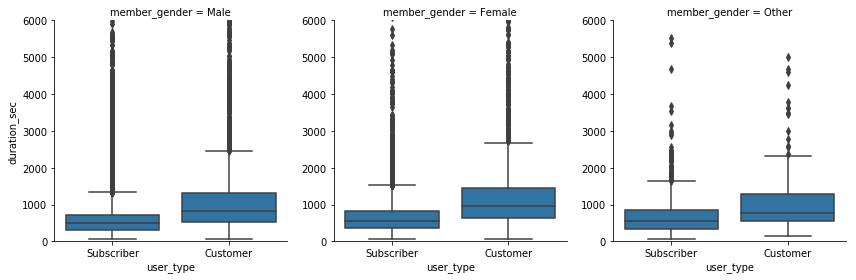

In [45]:
#plotting user_type vs duration_sec and seprating by genders
g=sb.FacetGrid(data=df,col='member_gender',size=4)
g.map(sb.boxplot,'user_type','duration_sec')
plt.ylim(0,6000)

#### It is observed that female customers has more long rides.Both male and female customers has long duration ride as compared to subscriber.

## Conclusion from Multivaiate exploratory Data Analysis
1. Customers  duration of rides is more as compared to subscribers and max. on Saturday and Sunday.
2. It is observed that female customers has more long rides.Both male and female customers has long duration ride as compared to subscriber.